In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [5]:
# Loading data
data = pd.read_csv("Eleicao.csv", sep=";")
data.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


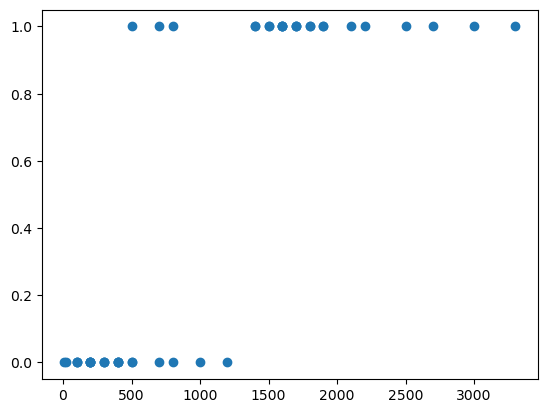

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


In [11]:
# show scatter
plt.scatter(data.DESPESAS, data.SITUACAO)
plt.show()
data.describe()

In [8]:
# split data
x = data.iloc[:,2].values
x = x[:, np.newaxis]
y = data.iloc[:,1].values

In [10]:
# make a  Logistic regression
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

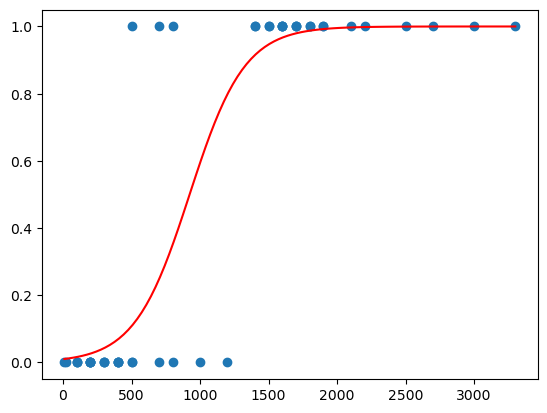

In [15]:
xtest = np.linspace(10, 3300, 100)
def fun(x):
    return 1/(1 + np.exp(-x))
r = fun(xtest*model.coef_+model.intercept_).ravel()

plt.scatter(x,y)
plt.plot(xtest, r, color = "red")
plt.show()

In [31]:
newData = pd.read_csv("NovosCandidatos.csv", sep=";")
newData.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


In [36]:
des = newData.DESPESAS.values.reshape(-1,1)
predict = model.predict(des)
newData["PREDICT"] = predict
newData.head()

,CANDIDATO,DESPESAS,PREDICT
0,A,0,0
1,B,10,0
2,C,200,0
3,D,500,0
4,E,900,0


In [35]:
newData.loc[newData["PREDICT"] == 1].head()

,CANDIDATO,DESPESAS,PREDICT
5,F,1500,1
6,G,3000,1
